In [11]:
# 데이터베이스 SQLite3
# 파일 형태로 로컬에 저장장
import sqlite3
import os
import pandas as pd

In [ ]:
# 데이터베이스 연결 4단계
# 1. DataBase 통로 연결
# 2. SQL 통로 생성
# 3. CRUD 작업
# 4. 통로 닫기

In [7]:
# 1. DataBase 통로 연결
# -> DB 경로(url), 권한(접근하고자 하는 ID,PW)
# sqlite3.connect("DB파일")
conn = sqlite3.connect("../DB/users.db")

# 2. SQL 통로 생성
# -> SQL(Structured Query Language)
# -> 질의를 전달하고 결과를 돌려 받는 통로!!
curs = conn.cursor()

# 3. CRUD 작업
# 만약 테이블이 없다면 새로 생성
# CREATE TABLE IF NOT EXISTS 테이블명
sql = """
CREATE TABLE IF NOT EXISTS contact(
    name TEXT,
    age INTEGER,
    email TEXT
)
"""

# SQL 통로를 통해 sql문 전달달
curs.execute(sql)

# 4. 통로 닫기
# 반드시, 역순으로 닫기
curs.close()
conn.close()


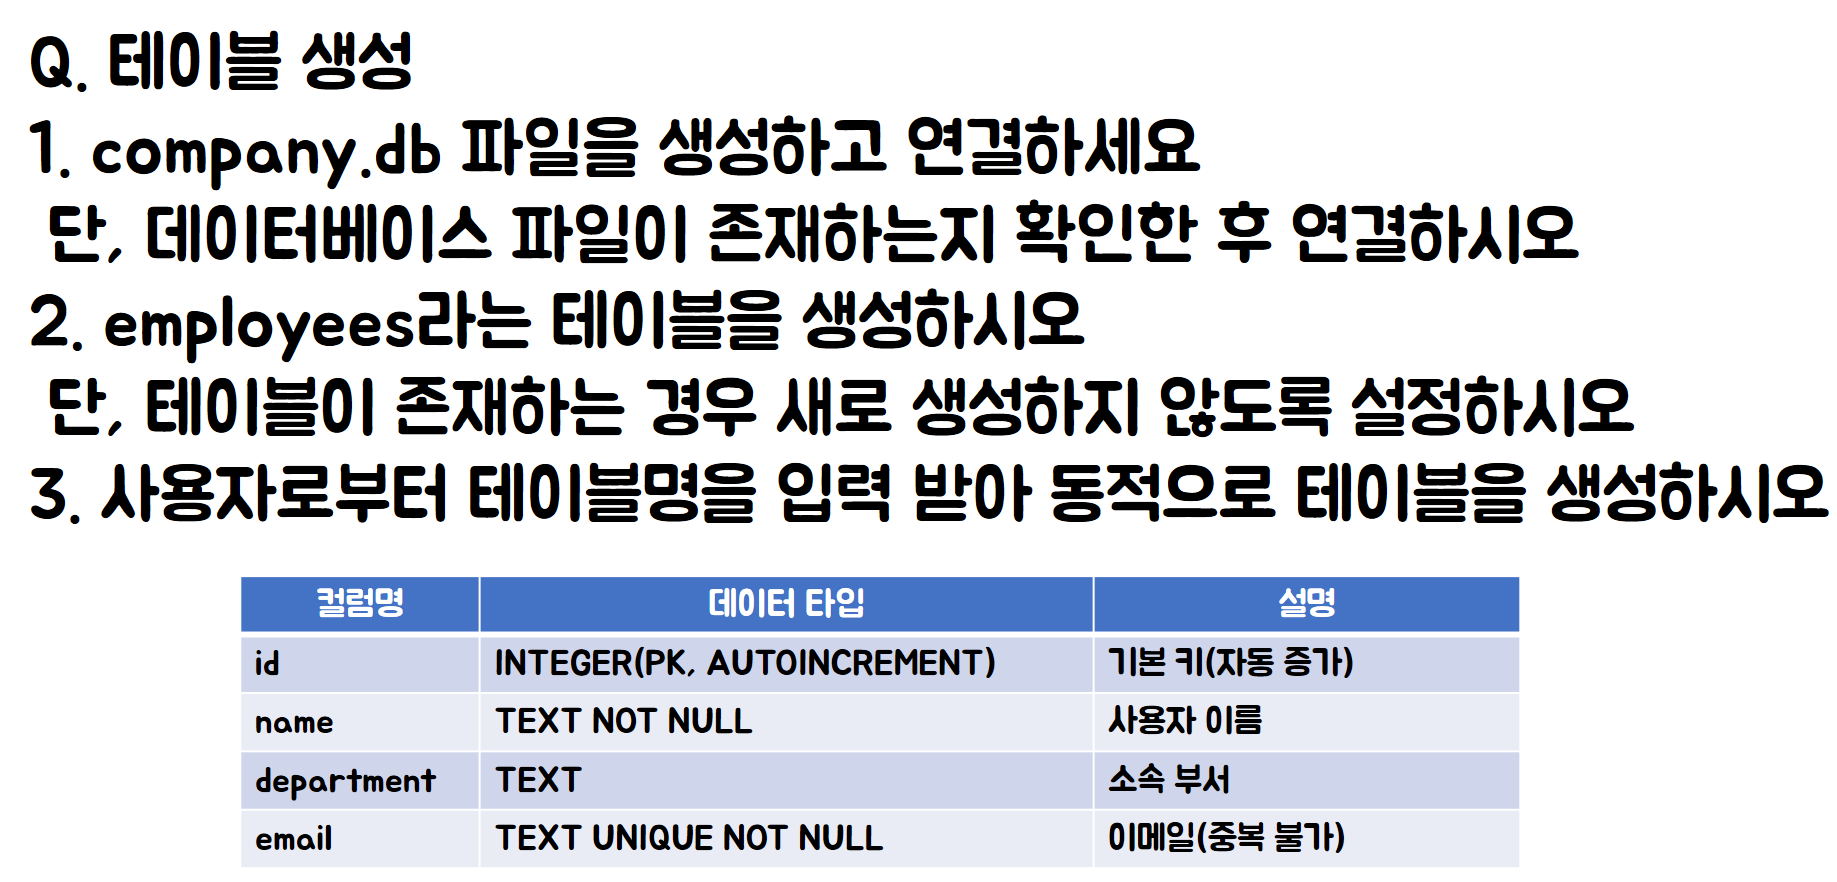

In [ ]:
# if not os.path.isdir("../DB/company.db"):
#     conn = sqlite3.connect("../DB/company.db")


conn = sqlite3.connect("../DB/company.db")

curs = conn.cursor()

# 제약 조건건
# PK (Primary Key)
# NN (Not Null)
# UK (Unique)
# FK (Foriegn Key)
sql = """
CREATE TABLE IF NOT EXISTS employee(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    department TEXT,
    email TEXT UNIQUE NOT NULL
)
"""

curs.execute(sql)

curs.close()
conn.close()

In [18]:
conn = sqlite3.connect("../DB/exam.db")
# curs = conn.cursor()
sql = """
SELECT *
FROM employees
"""
# curs.execute(sql)
# result = curs.fetchall()
# print(result)
df = pd.read_sql(sql, conn)
# curs.close()
conn.close()
df

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,1,Shawn,Owen,shawn.owen@example.com,+1-041-957-9167x8815,2018-04-01,MK_MAN,13549.0,NaN,117,14
1,2,Kristin,Santiago,kristin.santiago@example.com,001-672-465-1967x1798,2024-12-23,IT_PROG,10984.0,NaN,115,30
2,3,Daniel,Crosby,daniel.crosby@example.com,339.196.2423x2486,2018-09-12,MK_MAN,12135.0,NaN,106,39
3,4,Peter,Davis,peter.davis@example.com,281.303.8783x80253,2019-03-04,AC_ACCOUNT,13417.0,NaN,102,46
4,5,Kristin,Smith,kristin.smith@example.com,(994)046-0473x0206,2015-06-07,SA_REP,9997.0,0.15,101,49
...,...,...,...,...,...,...,...,...,...,...,...
174,175,Morgan,Ayers,morgan.ayers@example.com,(531)691-2173,2020-12-29,SA_REP,3780.0,0.06,120,75
175,176,Michael,Warren,michael.warren@example.com,965.553.8237,2024-10-22,SA_MAN,13501.0,0.06,105,47
176,177,Tyler,Stout,tyler.stout@example.com,4725484693,2022-06-29,FI_MGR,8043.0,NaN,109,41
177,178,Thomas,Rodriguez,thomas.rodriguez@example.com,654-556-2409,2021-05-26,HR_MAN,6902.0,NaN,109,72


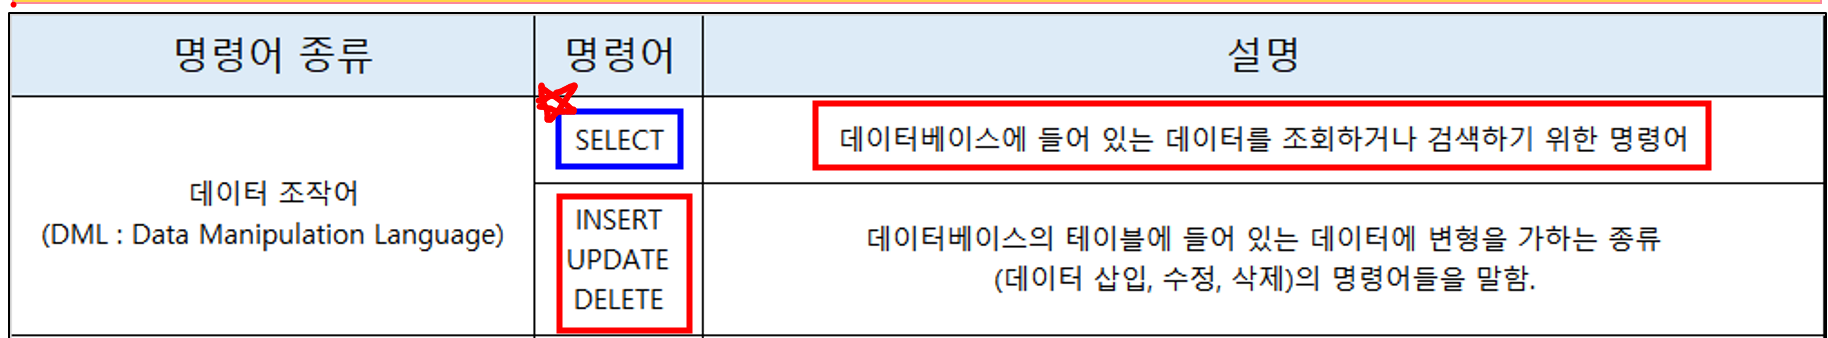

In [25]:
# SELECT 문
# SELECT 절
# -> 조회할 column명
# -> column1, column2, ..., ...
# 전부 조회 : *

# FROM 절
# 조회할 TABLE명

# departments 테이블의 모든 column을 조회해주세요
# SELECT *
# FROM departments

# Locations 테이블의 모든 City를 조회해주세요
# SELECT city
# FROM Locations

In [26]:
conn = sqlite3.connect("../DB/exam.db")
sql = """
SELECT city
FROM Locations
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,city
0,Roma
1,Venice
2,Tokyo
3,Hiroshima
4,Southlake
5,South San Francisco
6,South Brunswick
7,Seattle
8,Toronto
9,Whitehorse


In [27]:
conn = sqlite3.connect("../DB/exam.db")
sql = """
SELECT last_name 성씨, salary * 12 연봉
FROM employees
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,연봉
0,Owen,162588.0
1,Santiago,131808.0
2,Crosby,145620.0
3,Davis,161004.0
4,Smith,119964.0
...,...,...
174,Ayers,45360.0
175,Warren,162012.0
176,Stout,96516.0
177,Rodriguez,82824.0


In [ ]:
# AS(Alias) 사용법 3가지
# 1. AS "별칭"
# 2. AS 별칭
# 3. 한 칸 띄고 별칭

In [ ]:
# DISTINCT 컬럼명
# -> 중복된 컬럼 제거!!
# -> UNIQUE 값만 출력!!

In [28]:
conn = sqlite3.connect("../DB/exam.db")

# DISTINCT (중복 제거)

sql = """
SELECT DISTINCT department_id
FROM employees
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,department_id
0,14
1,30
2,39
3,46
4,49
...,...
72,70
73,13
74,65
75,99


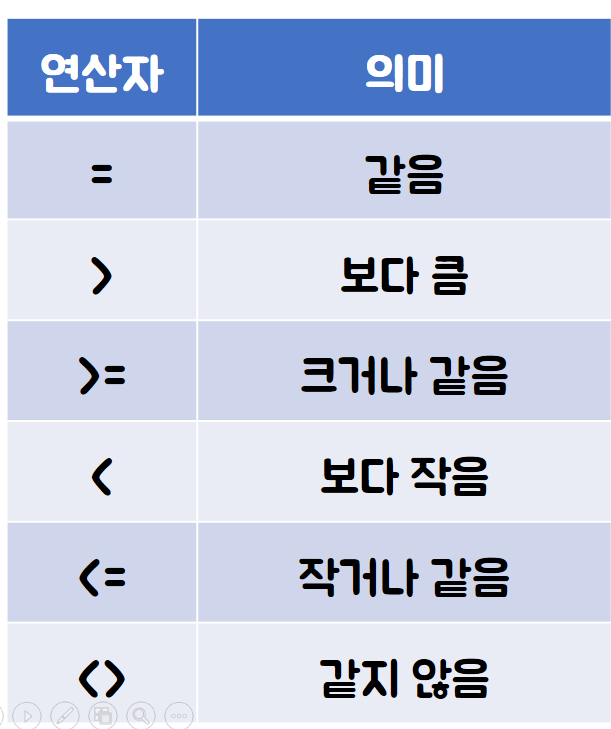

In [32]:
conn = sqlite3.connect("../DB/exam.db")

# WHERE 절
# WHERE 컬럼명 비교연산자 값
# SQL 문에서 문자열이나 날짜를 표기할 때는
# '' 홑따옴표를 사용한다

sql = """
SELECT first_name, email
FROM employees
WHERE department_id >= 50
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,first_name,email
0,Brenda,brenda.ramirez@example.com
1,Sara,sara.johnson@example.com
2,Tammy,tammy.ewing@example.com
3,Danielle,danielle.nguyen@example.com
4,Joel,joel.payne@example.com
...,...,...
102,Jeffrey,jeffrey.beasley@example.com
103,Donald,donald.patterson@example.com
104,Morgan,morgan.ayers@example.com
105,Thomas,thomas.rodriguez@example.com


In [39]:
# LIKE
# % -> 모든 문자포함
# O% -> O로 시작하는
# A% -> A로 시작하는
# %B -> B로 끝나는
# %C% -> C가 들어가는

# _ -> 한 글자!!
# O_ -> O로 시작하는 총 2글자
# _A -> A로 끝나는 총 2글자
# _B_ -> 2번째 문자가 B인 총 3글자

conn = sqlite3.connect("../DB/exam.db")

sql = """
SELECT last_name, email
FROM employees
WHERE last_name LIKE "O___"
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,last_name,email
0,Owen,shawn.owen@example.com


In [57]:
conn = sqlite3.connect("../DB/exam.db")

# ORDER BY 절
# 결과를 정렬 (오름차순, 내림차순)
# 성씨와 월급여를 조회!!
# 월급여가 많은 순으로 정렬!!
# ORDER BY 컬럼명 정렬기준
# 오름차순 : Ascending : ASC(기본값)
# 내림차순 : Descending : DESC

sql = """
SELECT last_name, salary * 12 * 1400
FROM employees
ORDER BY salary DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,last_name,salary * 12 * 1400
0,Haynes,250756800.0
1,Fields,249715200.0
2,Bradley,249194400.0
3,Powers,248320800.0
4,Morales,245784000.0
...,...,...
174,Smith,54885600.0
175,Kerr,53692800.0
176,Lawson,53272800.0
177,Glover,52802400.0


In [56]:
conn = sqlite3.connect("../DB/exam.db")

# 1. 연봉이 120000 이상되는 사원들의 성씨 및 연봉을 출력하시오
sql = """
SELECT last_name, salary * 12
FROM employees
WHERE salary * 12 >= 120000
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,last_name,salary * 12
0,Owen,162588.0
1,Santiago,131808.0
2,Crosby,145620.0
3,Davis,161004.0
4,Ramirez,160080.0
...,...,...
81,Hampton,123804.0
82,Johnson,150372.0
83,Meza,129120.0
84,Kaiser,133224.0


In [63]:
conn = sqlite3.connect("../DB/exam.db")

# 2. 사원번호가 176인 사원의 성씨와 부서 번호 출력
sql = """
SELECT last_name 성씨, department_id
FROM employees
WHERE employee_id = 176
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,department_id
0,Warren,47


In [69]:
conn = sqlite3.connect("../DB/exam.db")

# 3. 연봉이 150,000 에서 200,000의 범위 이외인 사원들의 성씨 및 연봉을 
# 출력하시오. 단 연봉은 AnnSal로 출력하시오
sql = """
SELECT last_name 성씨, salary * 12 AnnSal
FROM employees
WHERE salary*12 NOT BETWEEN 150000 AND 200000
ORDER BY salary DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,AnnSal
0,Little,149040.0
1,Carter,148644.0
2,Johnson,146652.0
3,Crosby,145620.0
4,Oneal,144912.0
...,...,...
129,Smith,39204.0
130,Kerr,38352.0
131,Lawson,38052.0
132,Glover,37716.0


In [72]:
conn = sqlite3.connect("../DB/exam.db")

# 4. 2020/01/01 일부터 2025/02/17일 사이에 고용된 사원들의 성씨, 사번,
# 고용일자를 출력하시오. 고용일자 순으로 정렬하시오
sql = """
SELECT last_name 성씨,employee_id 사번,hire_date 고용일자
FROM employees
WHERE hire_date BETWEEN 20200101 AND 20250217
ORDER BY hire_date DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,사번,고용일자
0,Walsh,158,2025-01-30
1,Santiago,2,2024-12-23
2,Kerr,52,2024-12-19
3,Bowers,124,2024-12-11
4,Thomas,142,2024-12-02
...,...,...,...
80,Farmer,53,2021-04-09
81,Johnson,30,2021-03-01
82,Adams,117,2021-02-03
83,Miller,153,2021-01-13


In [81]:
conn = sqlite3.connect("../DB/exam.db")

# 5. 20번 혹은 50 번 부서에서 근무하는 모든 사원들의 성씨 및 부서 번호를
# 알파벳순으로 출력하시오
sql = """
SELECT last_name 성씨,department_id 부서번호
FROM employees
WHERE department_id IN(20, 50)
ORDER BY last_name
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,부서번호,salary * 12
0,Meyers,20,94860.0
1,Moore,50,153576.0
2,Nguyen,50,153948.0
3,Potter,50,81036.0
4,Sims,50,120636.0


In [83]:
conn = sqlite3.connect("../DB/exam.db")

# 6. 20 번 혹은 50 번 부서에 근무하며, 연봉이 200,000 ~ 250,000 사이인 사원
# 들의 성씨 및 연봉을 출력하시오
sql = """
SELECT last_name 성씨,department_id 부서번호, salary*12 연봉
FROM employees
WHERE department_id IN(20, 50) AND salary*12 BETWEEN 200000 AND 250000
ORDER BY last_name
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,부서번호,연봉


In [90]:
conn = sqlite3.connect("../DB/exam.db")

# 7. 2020년도에 고용된 모든 사람들의 성씨 및 고용일을 조회한다
# LIKE "2020%"
# BETWEEN '2020-01-01' AND '2020-12-31'
sql = """
SELECT last_name 성씨,hire_date 고용일
FROM employees
WHERE hire_date LIKE "2020______"
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,고용일
0,Hunt,2020-03-07
1,Wilson,2020-07-19
2,Vazquez,2020-11-29
3,Stephenson,2020-11-20
4,Haley,2020-12-01
5,Mata,2020-02-20
6,Potter,2020-06-07
7,Branch,2020-11-10
8,Abbott,2020-01-06
9,Johns,2020-04-27


In [99]:
conn = sqlite3.connect("../DB/exam.db")

# 8. 매니저가 없는 사람들의 성씨 및 업무를 출력하시오
# 9. 매니저가 있는 사람들의 성씨 및 업무, 매니저번호를 조회한다.
sql = """
SELECT last_name 성씨,job_id 업무, manager_id 매니저번호
FROM employees
WHERE manager_id NOT LIKE 'NULL'
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,업무,매니저번호
0,Owen,MK_MAN,117
1,Santiago,IT_PROG,115
2,Crosby,MK_MAN,106
3,Davis,AC_ACCOUNT,102
4,Smith,SA_REP,101
...,...,...,...
174,Ayers,SA_REP,120
175,Warren,SA_MAN,105
176,Stout,FI_MGR,109
177,Rodriguez,HR_MAN,109


In [101]:
conn = sqlite3.connect("../DB/exam.db")

# 10. 커미션을 받는 모든 사원들의 성씨, 연봉 및 커미션을 출력하시오.
# - 연봉을 역순으로 정렬하고, 연봉은 ANNSAL로 출력하시오
sql = """
SELECT last_name 성씨, salary*12 AS "ANNSAL", commission_pct 커미션
FROM employees
WHERE commission_pct NOT LIKE 'NULL'
ORDER BY salary DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,ANNSAL,커미션
0,Brown,172128.0,0.08
1,Skinner,171120.0,0.13
2,Garcia,168732.0,0.20
3,Evans,162984.0,0.09
4,Warren,162012.0,0.06
5,Ferrell,161652.0,0.18
6,Jackson,156588.0,0.17
7,Howard,154356.0,0.20
8,Vazquez,152112.0,0.19
9,Abbott,138432.0,0.18


In [103]:
conn = sqlite3.connect("../DB/exam.db")

# 11. 성씨의 네번째 글자가 a인 사원의 성씨를 조회하시오
sql = """
SELECT last_name 성씨
FROM employees
WHERE last_name LIKE '___a%'
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨
0,Alvarado
1,Morales
2,Howard
3,Mccarthy
4,Edwards
5,Mata
6,Oneal
7,Morales
8,Arias
9,Salazar


In [104]:
conn = sqlite3.connect("../DB/exam.db")

# 12. 성씨에 a 및 e 글자가 있는 사원의 성씨를 조회하시오
sql = """
SELECT last_name 성씨
FROM employees
WHERE last_name LIKE '%a%' OR '%e%'
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨
0,Santiago
1,Davis
2,Ramirez
3,Alvarado
4,Morales
...,...
86,Kaiser
87,Beasley
88,Patterson
89,Ayers


In [112]:
conn = sqlite3.connect("../DB/exam.db")

# 13. 급여가 2500,3500,7000이 아니며
# 직업이 SA_REP나 PU_CLERK인 사원의 성씨와, 급여, 직업을 출력하시오.
sql = """
SELECT last_name 성씨, salary 급여, job_id 직업
FROM employees
WHERE salary NOT IN(2500,2500,7000)
AND job_id IN('SA_REP', 'PU_CLERK')
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,급여,직업
0,Smith,9997.0,SA_REP
1,Ramirez,13340.0,PU_CLERK
2,Ewing,8734.0,PU_CLERK
3,Johnson,9498.0,SA_REP
4,Roberts,10516.0,SA_REP
5,Vazquez,12676.0,SA_REP
6,Herring,8859.0,SA_REP
7,Stephenson,12920.0,PU_CLERK
8,Villa,11981.0,PU_CLERK
9,Shields,11737.0,PU_CLERK


In [120]:
conn = sqlite3.connect("../DB/exam.db")

# 14. 모든 사원들의 성씨, 부서 이름, 부서 번호를 출력하시오
# 부서 이름 : departments table에 있음
# 2개 이상의 테이블에서 데이터를 조회 > 조인
# 조인 : 관계형 데이터베이스의 가장 강력한 특징
sql = """
SELECT e.last_name 성씨, d.department_name 부서이름, e.department_id 부서번호
FROM employees e, departments d
WHERE e.department_id = d.department_id
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,성씨,부서이름,부서번호
0,Santiago,Purchasing,30
1,Nguyen,Shipping,50
2,Sims,Shipping,50
3,Nelson,Human Resources,40
4,Jenkins,Human Resources,40
5,Ramirez,Human Resources,40
6,Daniels,Finance,100
7,Anderson,Finance,100
8,Glover,Sales,80
9,Potter,Shipping,50


In [125]:
conn = sqlite3.connect("../DB/exam.db")

# 15. 30번 부서내의 모든 직업들을 유일한 값으로 출력하시오.
# 90번 부서 또한 포함하고, 직업을 오름차순으로 출력하시오 
sql = """
SELECT DISTINCT job_id 직업
FROM employees
WHERE department_id IN('30','90')
ORDER BY job_id
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,직업
0,HR_REP
1,IT_PROG
2,PU_CLERK
3,SA_MAN


In [158]:
conn = sqlite3.connect("../DB/exam.db")

sql = """
SELECT *
FROM departments
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,department_id,department_name,manager_id,location_id
0,10,Administration,101,1700
1,20,Marketing,102,1800
2,30,Purchasing,103,1900
3,40,Human Resources,104,2000
4,50,Shipping,105,2100
5,60,IT,106,2200
6,70,Public Relations,107,2300
7,80,Sales,108,2400
8,90,Executive,109,2500
9,100,Finance,110,2600


In [159]:
conn = sqlite3.connect("../DB/exam.db")

sql = """
SELECT *
FROM locations
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,location_id,street_address,postal_code,city,state_province,country_id
0,1000,1297 Via Cola di Rie,00989,Roma,RM,IT
1,1100,93091 Calle della Testa,10934,Venice,VE,IT
2,1200,2017 Shinjuku-ku,1689,Tokyo,TYO,JP
3,1300,9450 Kamiya-cho,10011,Hiroshima,HS,JP
4,1400,2014 Jabberwocky Rd,26192,Southlake,TX,US
5,1500,2011 Interiors Blvd,99236,South San Francisco,CA,US
6,1600,2007 Zagora St,50090,South Brunswick,NJ,US
7,1700,2004 Charade Rd,98199,Seattle,WA,US
8,1800,147 Spadina Ave,M5V 2L7,Toronto,ON,CA
9,1900,6092 Boxwood St,Y3W 9J6,Whitehorse,YT,CA


In [186]:
conn = sqlite3.connect("../DB/exam.db")

# 16. 커미션을 받지 않는 모든 사람들의 성씨, 부서 명, 지역 ID 및 도시 명을 출력하시오
sql = """
SELECT e.last_name, d.department_name, l.location_id, l.city, e.commission_pct
FROM employees e, departments d, locations l
WHERE e.commission_pct IS NULL
AND e.department_id = d.department_id
AND d.location_id = l.location_id
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,last_name,department_name,location_id,city,commission_pct
0,Santiago,Purchasing,1900,Whitehorse,None
1,Meyers,Marketing,1800,Toronto,None
2,Harmon,Purchasing,1900,Whitehorse,None
3,Thomas,Purchasing,1900,Whitehorse,None


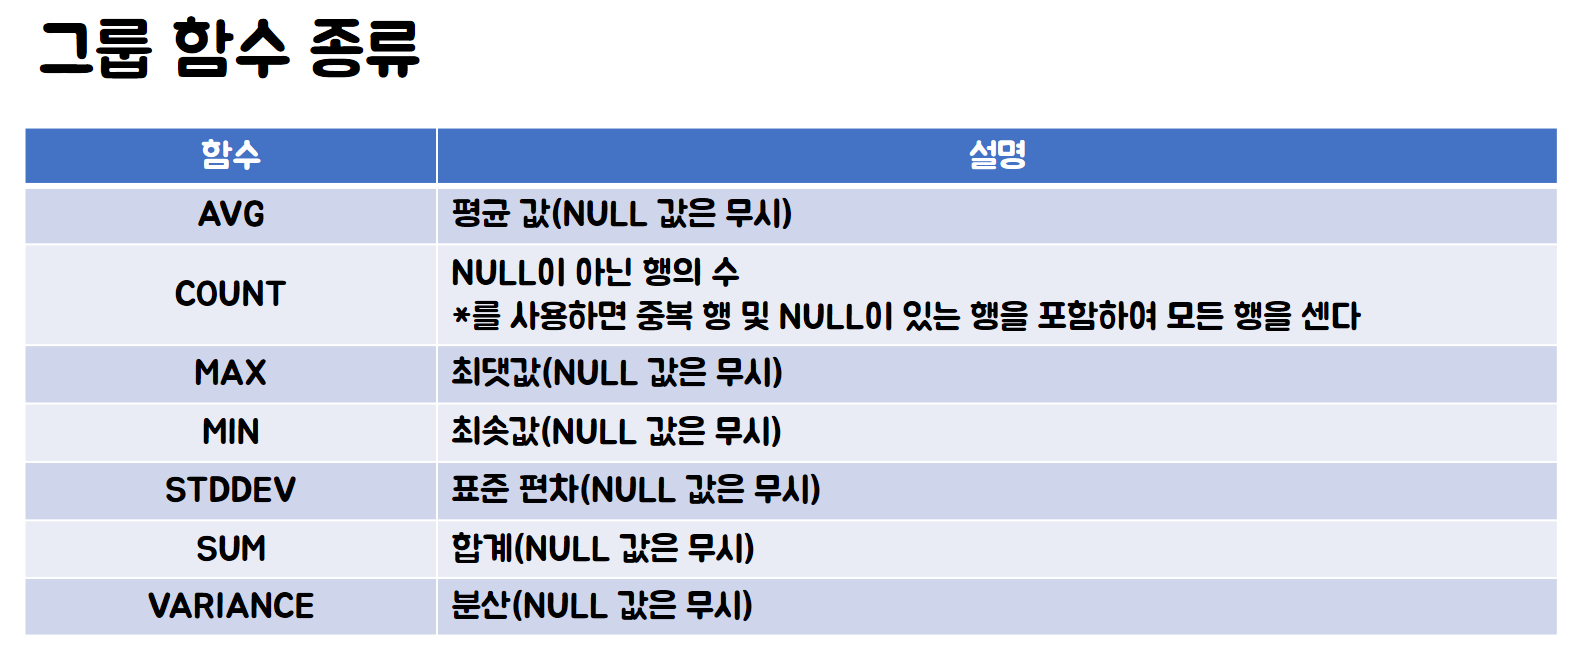

In [146]:
conn = sqlite3.connect("../DB/exam.db")

# 모든 사원 급여의 합
# 부서별?
# 11, 12, 13, 14 부서만

# WHERE 절에는 그룹화되지 않은 열(단일 열)에 대한 연산만 가능
# 그룹화된 column에 조건을 적용하기 위해서는
# HAVING 절을 이용
sql = """
SELECT SUM(salary*1440)
FROM employees
WHERE department_id IN(11, 12, 13, 14)
GROUP BY department_id
HAVING SUM(salary) * 1440 >= 10000000
ORDER BY SUM(salary) DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,SUM(salary*1440)
0,80110080.0
1,31292640.0
2,17598240.0


In [196]:
conn = sqlite3.connect("../DB/exam.db")

# 17. 자신의 매니저보다 먼저 고용된 사원들의 성씨 및 고용일을 출력하시오.
sql = """
SELECT e2.last_name 사원명, e2.hire_date 고용일, e2.manager_id, e1.last_name 매니저명, e1.hire_date 매니저고용일
FROM employees e1, employees e2
WHERE e1.employee_id = e2.manager_id
AND e1.hire_date > e2.hire_date
ORDER BY e2.hire_date
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,사원명,고용일,manager_id,매니저명,매니저고용일
0,Perez,2015-03-13,114,Woods,2020-12-12
1,Martin,2015-05-01,103,Stewart,2018-12-09
2,Shields,2015-05-02,117,Adams,2021-02-03
3,Thompson,2015-05-24,107,Hoffman,2021-06-15
4,Smith,2015-06-07,101,Branch,2020-11-10
...,...,...,...,...,...
95,Brown,2022-07-27,106,Webb,2023-12-17
96,Andrews,2022-12-15,113,Powell,2024-01-30
97,Jones,2023-02-15,113,Powell,2024-01-30
98,Morales,2023-05-03,120,Gutierrez,2023-09-18


In [147]:
conn = sqlite3.connect("../DB/exam.db")

# 18. 회사 전체의 최대 급여, 최소 급여, 급여 총 합 및 평균 급여를 출력하시오
sql = """
SELECT MAX(salary*1440), MIN(salary*1440), SUM(salary*1440), AVG(salary*1440)
FROM employees
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,MAX(salary*1440),MIN(salary*1440),SUM(salary*1440),AVG(salary*1440)
0,21493440.0,4510080.0,2.435289e+09,1.360497e+07


In [150]:
conn = sqlite3.connect("../DB/exam.db")

# 19. 각 직업별, 최대 급여, 최소 급여, 급여 총 합 및 평균 급여를 출력하시오.
# 단 최대 급여는 MAX, 최소 급여는 MIN, 급여 총 합은 SUM 및
# 평균 급여는 AVG로 출력하고, 직업을 오름차순으로 정렬하시오 
sql = """
SELECT job_id 직업, MAX(salary*1440) 최대급여, MIN(salary*1440) 최소급여, SUM(salary*1440) 급여총합, AVG(salary*1440) 급여평균
FROM employees
GROUP BY job_id
ORDER BY job_id
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,직업,최대급여,최소급여,급여총합,급여평균
0,AC_ACCOUNT,21404160.0,5891040.0,261918720.0,1.455104e+07
1,FI_MGR,20934720.0,6101280.0,196938720.0,1.406705e+07
2,HR_MAN,21493440.0,4525920.0,168537600.0,1.296443e+07
3,HR_REP,20044800.0,4602240.0,284181120.0,1.420906e+07
4,IT_PROG,19651680.0,4704480.0,165800160.0,1.184287e+07
5,MK_MAN,20933280.0,6870240.0,238754880.0,1.404440e+07
6,MK_REP,21284640.0,4816800.0,334915200.0,1.339661e+07
7,PU_CLERK,20980800.0,4510080.0,274916160.0,1.446927e+07
8,SA_MAN,20655360.0,4747680.0,292393440.0,1.271276e+07
9,SA_REP,20247840.0,5443200.0,216933120.0,1.355832e+07


In [198]:
conn = sqlite3.connect("../DB/exam.db")

# 20. 동일한 직업을 가진 사원들의 총 수를 출력하시오
sql = """
SELECT COUNT(job_id) 직업별사원수
FROM employees
GROUP BY job_id
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,직업별사원수
0,18
1,14
2,13
3,20
4,14
5,17
6,25
7,19
8,23
9,16


In [155]:
conn = sqlite3.connect("../DB/exam.db")

# 21. 매니저로 근무하는 사원들의 총 수를 출력하시오
sql = """
SELECT COUNT(DISTINCT manager_id) 매니저수
FROM employees
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,매니저수
0,21


In [199]:
conn = sqlite3.connect("../DB/exam.db")

# 22. 사내의 최대 급여 및 최소 급여의 차이를 출력하시오.
sql = """
SELECT MAX(salary), MIN(salary), MAX(salary) - MIN(salary)
FROM employees
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,MAX(salary),MIN(salary),MAX(salary) - MIN(salary)
0,14926.0,3132.0,11794.0


In [202]:
conn = sqlite3.connect("../DB/exam.db")

#23. 매니저의 사번 및 그 매니저 밑 사원들 중 최소 급여를 받는 사원의 급여를 출력하시오
#      - 매니저가 없는 사람들은 제외한다.
#      - 최소 급여가 5000 미만인 경우는 제외한다.
#      - 급여 기준 역순으로 조회한다.
sql = """
SELECT manager_id, MIN(salary)
FROM employees
WHERE manager_id IS NOT 'NULL'
GROUP BY manager_id
HAVING salary >= 5000
ORDER BY salary DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,manager_id,MIN(salary)
0,112,11595.0
1,106,6669.0
2,113,6515.0
3,114,6117.0
4,119,5886.0
5,102,5432.0
6,115,5109.0


In [210]:
conn = sqlite3.connect("../DB/exam.db")

# 24. 부서 명, 부서위치ID, 각 부서 별 사원 총 수, 각 부서 별 평균 급여를 
#     출력하되, 부서위치를 오름차순으로 출력하시오
sql = """
SELECT d.department_name 부서명, d.location_id 부서위치, COUNT(e.employee_id) 사원수, AVG(e.salary) 평균급여
FROM employees e, departments d
WHERE e.department_id = d.department_id
GROUP BY e.department_id
ORDER BY d.location_id
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,부서명,부서위치,사원수,평균급여
0,Marketing,1800,1,7905.000000
1,Purchasing,1900,4,12023.500000
2,Human Resources,2000,3,11436.333333
3,Shipping,2100,4,10608.250000
4,IT,2200,2,8859.500000
5,Public Relations,2300,1,14461.000000
6,Sales,2400,1,3143.000000
7,Finance,2600,5,8476.200000


In [240]:
conn = sqlite3.connect("../DB/exam.db")

# 25. 성씨가 Rice인 사람과 같은 부서에서 근무하는 사원들의
# 사번(employee_id) 및 고용날짜(hire_date)를 출력하시오

# 서브쿼리(Sub Query)
# 소괄호 안에 쿼리문을 작성하여 연산된 결과를 사용!!
sql = """
SELECT employee_id, hire_date
FROM employees
WHERE department_id = (SELECT department_id
                        FROM employees
                        WHERE last_name LIKE 'RICE')
AND last_name NOT LIKE 'RICE'
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,employee_id,hire_date
0,16,2016-08-27
1,84,2024-10-12
2,160,2017-05-16


In [244]:
conn = sqlite3.connect("../DB/exam.db")

# 26. 회사 전체 평균 급여보다 더 급여를 많이 받는 사원들의 사번 및 성씨를 출력하시오

sql = """
SELECT employee_id, last_name
FROM employees
WHERE salary > (SELECT AVG(salary)
                FROM employees)
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,employee_id,last_name
0,1,Owen
1,2,Santiago
2,3,Crosby
3,4,Davis
4,5,Smith
...,...,...
85,162,Hampton
86,167,Johnson
87,170,Meza
88,171,Kaiser


In [250]:
conn = sqlite3.connect("../DB/exam.db")

# 27. 성씨에 u 가 포함되는 사원들과 동일 부서에 근무하는 사원들의
#     사번 및 성씨를 출력하시오.
sql = """
SELECT employee_id, last_name
FROM employees
WHERE department_id IN (SELECT department_id
                        FROM employees
                        WHERE last_name LIKE '%u%')
AND last_name NOT LIKE '%u%'
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,employee_id,last_name
0,8,Ewing
1,10,Bell
2,22,Patel
3,24,Sims
4,78,Perez
5,88,Caldwell
6,94,Potter
7,99,Moore
8,103,Stewart
9,131,Reid


In [253]:
conn = sqlite3.connect("../DB/exam.db")

# 28. 시애틀에 근무하는 사람 중
# 커미션을 받지않는 모든 사람들의 성씨, 부서 명, 지역 ID를 출력하시오
sql = """
SELECT last_name, department_name, location_id
FROM employees e, departments d
WHERE e.department_id = d.department_id
AND commission_pct = 'NULL'
AND location_id = (SELECT location_id
                    FROM locations
                    WHERE City = 'Seatle')
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,last_name,department_name,location_id


In [255]:
conn = sqlite3.connect("../DB/exam.db")

# 29. 성씨가 Erikson 인 사람보다 후에 고용된 사원들의 성씨 및 고용일자
#     를 출력하시오. 고용일자를 역순으로 출력하시오
sql = """
SELECT last_name, hire_date
FROM employees
WHERE hire_date > (SELECT hire_date
                FROM employees
                WHERE last_name LIKE 'RICE')
ORDER BY hire_date DESC
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,last_name,hire_date
0,Walsh,2025-01-30
1,Santiago,2024-12-23
2,Kerr,2024-12-19
3,Bowers,2024-12-11
4,Thomas,2024-12-02
...,...,...
145,West,2017-09-11
146,Johnson,2017-07-18
147,Rios,2017-05-27
148,Jones,2017-05-16


In [ ]:
conn = sqlite3.connect("../DB/exam.db")

# 30. 회사 전체 평균급여보다 더 많이 받는 사원들 중 성씨에 u 가 있는 사원들이
# 근무하는 부서에서 근무하는 사원들의 사번, 성씨 및 급여를 출력하시오
sql = """
SELECT employee_id, last_name, salary
FROM employees
WHERE department_id IN (SELECT department_id
                        FROM employees
                        WHERE salary > (SELECT AVG(salary)
                                        FROM employees)
                        AND last_name LIKE '%u%')
"""
df = pd.read_sql(sql, conn)
conn.close()
df

,employee_id,last_name,salary
0,9,Nguyen,12829.0
1,20,Krueger,10840.0
2,24,Sims,10053.0
3,38,Vazquez,12676.0
4,63,Marquez,14231.0
5,88,Caldwell,10714.0
6,94,Potter,6753.0
7,99,Moore,12798.0
8,131,Reid,7487.0
9,168,Suarez,5511.0


In [270]:
# 빠르게 테이블 만들고 오자!!
conn_sensing = sqlite3.connect("sensing.db")
curs_sensing = conn_sensing.cursor()
sql_sensing = """
CREATE TABLE IF NOT EXISTS temp(
                                data FLOAT,
                                day DATETIME DEFAULT CURRENT_TIMESTAMP
                                )
"""
curs_sensing.execute(sql_sensing)

curs_sensing.close()
conn_sensing.close()

In [314]:
# C(CREATE)
# 데이터 삽입
# INSERT INTO 테이블명
# VALUES (값)

# INSERT INTO 테이블명(컬럼명1, 컬럼명2, ...)
# VALUES (값1, 값2, ...)
# 컬럼명을 생략하면
# NULL 값이 들어간다
# 이 때, column에 DEFAULT 옵션이 걸려 있다면 발동한다

# 데이터를 삽입해보자
conn_sensing = sqlite3.connect("sensing.db")
curs_sensing = conn_sensing.cursor()
sql_sensing = """
INSERT INTO temp(data)
VALUES (2.2)
"""
curs_sensing.execute(sql_sensing)

conn_sensing.commit()

curs_sensing.close()
conn_sensing.close()

In [290]:
# U(UPDATE)

# UPDATE 테이블명
# SET 컬럼명 = 값

# 데이터를 수정해보자
conn_sensing = sqlite3.connect("sensing.db")
curs_sensing = conn_sensing.cursor()
sql_sensing = """
UPDATE temp
SET time = time + 20
"""
curs_sensing.execute(sql_sensing)

conn_sensing.commit()

curs_sensing.close()
conn_sensing.close()

In [ ]:
# D(DELETE)

# DELETE FROM 테이블명
# -> 모든 데이터가 삭제!!

# DELETE FROM 테이블명
# WHERE 조건

# DROP TABLE 테이블명
# -> 모든 데이터가 삭제!!

# 데이터를 수정해보자
conn_sensing = sqlite3.connect("sensing.db")
curs_sensing = conn_sensing.cursor()
sql_sensing = """
DELETE FROM temp
WHERE time = '2025-02-17 07:40:53'

"""
curs_sensing.execute(sql_sensing)

conn_sensing.commit()

curs_sensing.close()
conn_sensing.close()

In [318]:
# 트랜잭션 Transaction
# 데이터베이스의 작업단위
# 시작 ~ 끝
# 데이터 삽입!! ~~~~~ 삽입 끝!!
# 단, 작업이 끝났을 때, DB관리자는 2가지 선택
# 1) 작업 반영 -> commit
# 2) 작업 취소 -> rollback

# CRUD 중
# R(READ)의 경우 작업 X

# CUD 작업은 데이터의 변화가 일어난다

# 단, CREATE TABLE처럼 강력하게 반영되는 일련의 작업들은 
# Auto Commit이 된다.

# ex) 서울 기온 정보를 3개 추가
# 1번 데이터 추가, 2번 데이터 추가, 3번 데이터 추가
# 반영? or 취소?

# 데이터를 수정해보자
conn_sensing = sqlite3.connect("sensing.db")
curs_sensing = conn_sensing.cursor()

conn_sensing.rollback()

sql_sensing = """
DELETE FROM temp
WHERE time = '2025-02-17 07:37:36'

"""
curs_sensing.execute(sql_sensing)

conn_sensing.commit()


curs_sensing.close()
conn_sensing.close()

In [319]:
# R(READ)
# sensing.db안에 있는 temp table 데이터를 전부 SELECT하는 셀
conn_sensing = sqlite3.connect("sensing.db")

sql_sensing = """
SELECT *
FROM temp
"""

df_sensing = pd.read_sql(sql_sensing, conn_sensing)

conn_sensing.close()

df_sensing

,data,time
0,2.2,2025-02-17 07:37:37
1,2.2,2025-02-17 07:37:37
2,2.2,2025-02-17 07:37:40
3,2.2,2025-02-17 07:37:40
4,2.2,2025-02-17 07:37:41
5,2.2,2025-02-17 07:37:42
6,2.2,2025-02-17 07:37:43
7,2.2,2025-02-17 07:37:44
8,2.2,2025-02-17 07:40:53
